#### 以sklearn内置数据集波士顿房价为例，探索简单线性回归模型 f(x) = k*x + b中参数 k 和 b 的选择。  
#### 1.random随机选取  
#### 2.加入方向随机选择  
#### 3.梯度下降

In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
data = load_boston()
X,y = data['data'],data['target']
print(X.shape)
len(y)
print(data['DESCR'])  #数据集描述

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

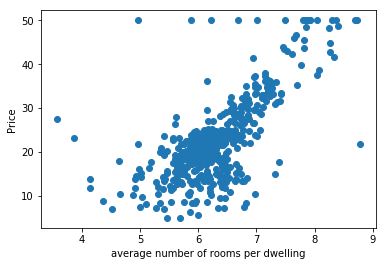

In [3]:
def draw_price_rm():       #源数据集平均房间数与价格的散点图
    plt.scatter(X[:,5],y)
    plt.xlabel('average number of rooms per dwelling')
    plt.ylabel('Price')
draw_price_rm()

### 1.random choose method
#### ——随机选择参数k和b的值拟合曲线

In [4]:
def loss(y,y_hat): #定义损失函数——平方损失
    n = len(y)
    return sum((y - y_hat)**2)/n

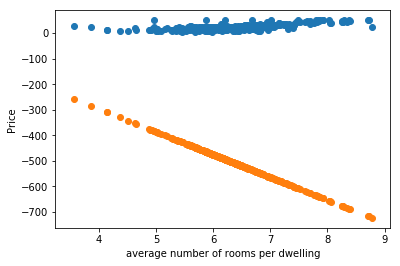

In [5]:
from random import randint

def get_price(k,b,rm):
    return k * rm + b

rdm_k = randint(-100,100)
rdm_b = randint(-100,100)

price_random = [get_price(rdm_k,rdm_b,rm) for rm in X[:,5]]

draw_price_rm()
plt.scatter(X[:,5],price_random)

In [6]:
trying_times = 1000

min_loss=float('inf')
for i in range(trying_times):
    rdm_k = randint(-100,100)
    rdm_b = randint(-100,100)
    rdm_price = [get_price(rdm_k,rdm_b,rm) for rm in X[:,5]]
    
    current_loss = loss(y,rdm_price)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k,best_b = rdm_k,rdm_b
        print('times:{}, loss:{}, best_k:{}, best_b:{}'.format(i,min_loss,best_k,best_b))

times:0, loss:7880.946256814228, best_k:-22, best_b:75
times:2, loss:599.1306770513834, best_k:2, best_b:33
times:54, loss:178.62313852173912, best_k:-6, best_b:65
times:149, loss:82.87313840316213, best_k:16, best_b:-82
times:732, loss:43.6065241245059, best_k:9, best_b:-34


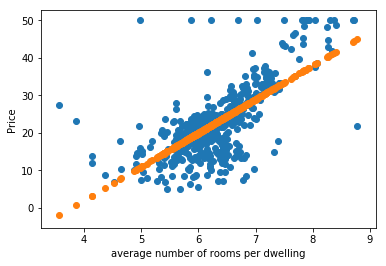

In [7]:
rdm_best_price = [get_price(best_k,best_b,rm) for rm in X[:,5]]
draw_price_rm()
plt.scatter(X[:,5],rdm_best_price)     #黄色为拟合曲线

### 2.direction adjusting
#### ——加入方向随机选择

In [10]:
import random

trying_times = 1000
k = random.randint(-100,100)
b = random.randint(-100,100)


direction=[(+1, +1),  #参数k、b可能的方向组合
           (+1, -1),
           (-1, +1),
           (-1, -1)]
next_direction = random.choice(direction)

scaler = 0.1
update = 0
min_loss = float('inf')
for i in range(trying_times):
    k_direction, b_direction = next_direction
    
    next_k, next_b = k + k_direction*scaler, b + b_direction*scaler
    
    price_hat = [get_price(next_k,next_b,rm) for rm in X[:,5]]
    current_loss = loss(y, price_hat)
    if current_loss < min_loss:
        min_loss = current_loss       
        k, b = next_k, next_b
        next_direction = next_direction       
        print('times:{}, direction:{}, min_loss:{}, best_k:{}, best_b:{}'.format(i,next_direction,min_loss,k,b))                
    else:
        next_direction = random.choice(direction)

times:0, direction:(-1, 1), min_loss:28520.33667833455, best_k:-22.1, best_b:-5.9
times:5, direction:(1, -1), min_loss:28340.697837841915, best_k:-22.0, best_b:-6.0
times:6, direction:(1, -1), min_loss:28161.62739846574, best_k:-21.9, best_b:-6.1
times:7, direction:(1, -1), min_loss:27983.125360206057, best_k:-21.799999999999997, best_b:-6.199999999999999
times:8, direction:(1, -1), min_loss:27805.1917230629, best_k:-21.699999999999996, best_b:-6.299999999999999
times:9, direction:(1, -1), min_loss:27627.82648703619, best_k:-21.599999999999994, best_b:-6.399999999999999
times:10, direction:(1, -1), min_loss:27451.029652125984, best_k:-21.499999999999993, best_b:-6.499999999999998
times:11, direction:(1, -1), min_loss:27274.801218332246, best_k:-21.39999999999999, best_b:-6.599999999999998
times:12, direction:(1, -1), min_loss:27099.141185654997, best_k:-21.29999999999999, best_b:-6.6999999999999975
times:13, direction:(1, -1), min_loss:26924.04955409423, best_k:-21.19999999999999, best

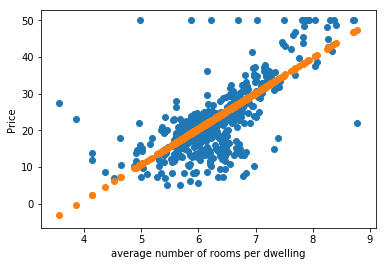

In [11]:
draw_price_rm()
plt.scatter(X[:,5],price_hat)

### 3.gradient descent
####                ——梯度下降

In [12]:
def partial_k(y,y_hat,x): #loss对参数k的偏导
    n = len(y)
    return -2/n*sum((y-y_hat)*x)
    
    
def partial_b(y,y_hat,x): #loss对参数b的偏导
    n = len(y)
    return -2/n*sum(y-y_hat)

trying_times = 1000
current_k,current_b = random.randint(-100,100), random.randint(-100,100)
learning_rate = 0.01
min_loss = float('inf')

for i in range(trying_times):
    price_hat = [get_price(current_k, current_b, rm) for rm in X[:,5]]
    current_loss = loss(y, price_hat)
    
    gradient_k, gradient_b = partial_k(y, price_hat, X[:,5]), partial_b(y, price_hat, X[:,5])
    next_k, next_b = current_k - gradient_k * learning_rate, current_b - gradient_b * learning_rate 
    
    if current_loss < min_loss:
        min_loss = current_loss
        current_k, current_b = next_k, next_b        
        print('times:{}, min_loss:{}, best_k:{}, best_b:{}'.format(i,min_loss,current_k,current_b))    
  

times:0, min_loss:165922.92566238527, best_k:17.490788480513892, best_b:-14.102139328063245
times:1, min_loss:5449.441286953631, best_k:8.196328215307185, best_b:-15.567904629950446
times:2, min_loss:223.83864969445327, best_k:6.519687700823658, best_b:-15.836108933908047
times:3, min_loss:53.671990080613206, best_k:6.217712941553978, best_b:-15.888207699135489
times:4, min_loss:48.12872361035731, best_k:6.163801949495717, best_b:-15.901308469934012
times:5, min_loss:47.946194857408464, best_k:6.154654911747918, best_b:-15.907371007825652
times:6, min_loss:47.93823220357483, best_k:6.153585567914575, best_b:-15.912162579200016
times:7, min_loss:47.93595502801436, best_k:6.153973736318993, best_b:-15.916723910446354
times:8, min_loss:47.93386396268881, best_k:6.1546247788610025, best_b:-15.921242804997815
times:9, min_loss:47.93177992769612, best_k:6.155323118374029, best_b:-15.92575315294519
times:10, min_loss:47.92969709107636, best_k:6.156029853133904, best_b:-15.930261070103969
time

times:185, min_loss:47.580205143798494, best_k:6.277450088540667, best_b:-16.702632223266402
times:186, min_loss:47.57829138142014, best_k:6.278129340658365, best_b:-16.706953026145403
times:187, min_loss:47.576378539344674, best_k:6.278808429434769, best_b:-16.711272789991156
times:188, min_loss:47.5744666171295, best_k:6.279487354909158, best_b:-16.715591515053518
times:189, min_loss:47.57255561433229, best_k:6.2801661171208005, best_b:-16.71990920158229
times:190, min_loss:47.57064553051092, best_k:6.280844716108958, best_b:-16.724225849827207
times:191, min_loss:47.568736365223444, best_k:6.2815231519128805, best_b:-16.72854146003795
times:192, min_loss:47.56682811802822, best_k:6.282201424571809, best_b:-16.732856032464138
times:193, min_loss:47.56492078848361, best_k:6.282879534124977, best_b:-16.737169567355327
times:194, min_loss:47.5630143761485, best_k:6.283557480611605, best_b:-16.74148206496102
times:195, min_loss:47.561108880581685, best_k:6.284235264070907, best_b:-16.745

times:376, min_loss:47.230880749496734, best_k:6.4042678135416145, best_b:-17.509334737716546
times:377, min_loss:47.229134972573696, best_k:6.404916569513922, best_b:-17.51346155101588
times:378, min_loss:47.2273900351715, best_k:6.405565169478413, best_b:-17.517587371931075
times:379, min_loss:47.22564593688657, best_k:6.406213613472602, best_b:-17.521712200700776
times:380, min_loss:47.22390267731526, best_k:6.406861901533994, best_b:-17.52583603756357
times:381, min_loss:47.22216025605426, best_k:6.407510033700091, best_b:-17.529958882757974
times:382, min_loss:47.220418672700575, best_k:6.4081580100083775, best_b:-17.534080736522466
times:383, min_loss:47.21867792685106, best_k:6.408805830496335, best_b:-17.53820159909545
times:384, min_loss:47.21693801810309, best_k:6.409453495201434, best_b:-17.542321470715287
times:385, min_loss:47.21519894605416, best_k:6.410101004161135, best_b:-17.546440351620266
times:386, min_loss:47.21346071030175, best_k:6.410748357412889, best_b:-17.550

times:573, min_loss:46.902675468850866, best_k:6.529107387052931, best_b:-18.30345399710012
times:574, min_loss:46.901087521482204, best_k:6.529726122570414, best_b:-18.30738984674361
times:575, min_loss:46.89950033773634, best_k:6.530344709299166, best_b:-18.31132474992443
times:576, min_loss:46.89791391724601, best_k:6.530963147274969, best_b:-18.315258706870175
times:577, min_loss:46.89632825964413, best_k:6.531581436533592, best_b:-18.319191717808387
times:578, min_loss:46.894743364564015, best_k:6.532199577110796, best_b:-18.323123782966558
times:579, min_loss:46.89315923163876, best_k:6.5328175690423365, best_b:-18.32705490257212
times:580, min_loss:46.891575860502016, best_k:6.533435412363959, best_b:-18.33098507685245
times:581, min_loss:46.88999325078735, best_k:6.534053107111399, best_b:-18.334914306034875
times:582, min_loss:46.88841140212872, best_k:6.534670653320385, best_b:-18.338842590346665
times:583, min_loss:46.88683031416008, best_k:6.535288051026636, best_b:-18.3427

times:737, min_loss:46.65219869117049, best_k:6.628616878106214, best_b:-18.936445612773227
times:738, min_loss:46.65073119475293, best_k:6.629211684351137, best_b:-18.940229245490084
times:739, min_loss:46.64926440403488, best_k:6.629806347561658, best_b:-18.944011968348217
times:740, min_loss:46.64779831867705, best_k:6.6304008677721695, best_b:-18.94779378156642
times:741, min_loss:46.64633293834, best_k:6.63099524501706, best_b:-18.95157468536344
times:742, min_loss:46.64486826268499, best_k:6.631589479330709, best_b:-18.955354679957964
times:743, min_loss:46.643404291372974, best_k:6.632183570747489, best_b:-18.95913376556863
times:744, min_loss:46.641941024065325, best_k:6.63277751930176, best_b:-18.962911942414028
times:745, min_loss:46.64047846042344, best_k:6.633371325027877, best_b:-18.966689210712687
times:746, min_loss:46.63901660010897, best_k:6.633964987960188, best_b:-18.97046557068309
times:747, min_loss:46.637555442783665, best_k:6.63455850813303, best_b:-18.9742410225

times:983, min_loss:46.311652803260124, best_k:6.770711958658833, best_b:-19.840329188763388
times:984, min_loss:46.310349070830874, best_k:6.771272594978095, best_b:-19.84389546255073
times:985, min_loss:46.30904596534921, best_k:6.771833096479873, best_b:-19.847460878748144
times:986, min_loss:46.307743486513694, best_k:6.772393463196586, best_b:-19.851025437561855
times:987, min_loss:46.306441634022825, best_k:6.772953695160647, best_b:-19.854589139198037
times:988, min_loss:46.305140407575514, best_k:6.773513792404459, best_b:-19.85815198386282
times:989, min_loss:46.30383980687075, best_k:6.774073754960419, best_b:-19.861713971762285
times:990, min_loss:46.30253983160753, best_k:6.774633582860916, best_b:-19.865275103102455
times:991, min_loss:46.30124048148515, best_k:6.77519327613833, best_b:-19.86883537808931
times:992, min_loss:46.29994175620295, best_k:6.775752834825035, best_b:-19.87239479692878
times:993, min_loss:46.29864365546047, best_k:6.7763122589533955, best_b:-19.875

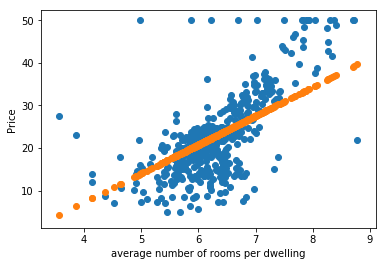

In [13]:
draw_price_rm()
plt.scatter(X[:,5],price_hat) 

#### 不同步长下拟合曲线 

In [16]:
def get_best_k_b(learning_rate):

    trying_times = 1000
    current_k, current_b = random.randint(-100,100), random.randint(-100,100)
    min_loss = float('inf')
    
    for i in range(trying_times):
        price_hat = [get_price(current_k, current_b, rm) for rm in X[:,5]]
        k_direction, b_direction = -partial_k(y,price_hat,X[:,5]), -partial_b(y,price_hat,X[:,5])
        
        next_k,next_b = current_k + k_direction*learning_rate, current_b + b_direction*learning_rate
        
        current_loss = loss(y,price_hat)
        if current_loss < min_loss:
            min_loss = current_loss
            current_k, current_b = next_k, next_b
        
    return price_hat

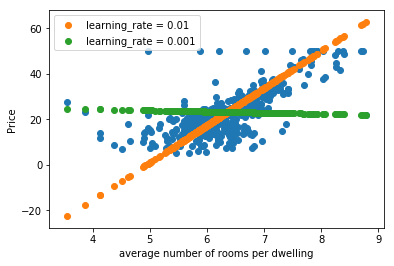

In [22]:
draw_price_rm()      
#plt.scatter(X[:,5], get_best_k_b(0.1), label='learning_rate = 0.1')
plt.scatter(X[:,5], get_best_k_b(0.01), label='learning_rate = 0.01')
plt.scatter(X[:,5], get_best_k_b(0.001), label='learning_rate = 0.001')
plt.legend(loc='upper left')